In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

from Create_Random_Graph import create_random_G
from TSP_Brute_Force import tsp_brute_force
from TSP_Greedy import tsp_greedy
from TSP_Christofides import tsp_christofides

In [ ]:
# 25 graphs of 3 nodes will be input into tsp_brute_force() and the maximum computation time will be extracted.
# The same will be done for 4 nodes, 5 nodes, ..., 13 nodes. The result will be worst_times_brute_force, a NumPy
# array of length 10 which has these 10 maximum computation times.
worst_times_brute_force = np.array([0]*10)
n_iterations = 25
for i in range(n_iterations):
    
    # The computation time for the graph of 3 nodes, the graph of 4 nodes, ..., the graph of 13 nodes for iteration i. 
    times_brute_force = []
    
    # Compute a graph of 3 nodes, a graph of 4 nodes, ..., a graph of 13 nodes. 
    # For each calculate the computation time when the graph is input into tsp_brute_force().
    for n in range(3, 13):
    
        # Create a random graph with n nodes (labeled 0,1,2,...,n-1) satisfying the triangle inequality.
        # This graph will be input into tsp_brute_force() with 0 as the starting node, and the time to 
        # compute the Hamiltonian cycle output will be recorded.
        nodes = list(range(n))
        max_weight = 250
        G = create_random_G(nodes, max_weight)
        start = 0

        # Compute a Hamiltonian cycle using the brute-force approach and record the computation time.
        t1 = time.time()
        tsp_brute_force(G, start)
        t2 = time.time()
        times_brute_force.append(t2-t1)
    
    # Update the maximum time for each graph size.
    times_brute_force = np.array(times_brute_force)
    pprint.pprint(times_brute_force)
    worst_times_brute_force = np.maximum(times_brute_force, worst_times_brute_force)

Each blue scatterplot point in the visualization below represents a maximum of 25 values. For example, consider the point where the number of nodes is 10 and the worst case computation time is 2 seconds. This means that, after calling tsp_brute_force() on 25 different graphs with 10 nodes each, the maximum amount of time it took for the Hamiltonian cycle output to be generated was 2 seconds.

The visualization shows that the output is generated almost instantly when the number of nodes in the graph is <= 9. At 11 nodes the end-user would have to wait up to 9 seconds to get their optimal Hamiltonian cycle generated - not an unreasonable waiting time. However, once the number of nodes increases to 12 nodes the end-user is waiting up to 71 seconds, which is probably too long for impatient end-users in the age of the internet. The computation time would skyrocket factorially if we were to extend the graph to include even 13 nodes. 

For these reasons we will by default only use the brute force technique to generate a minimum-weight Hamiltonian cycle when the number of nodes is <= 11. When the number of nodes is > 11 we will use both the greedy approach and Christofides algorithm to generate a Hamiltonian cycle.

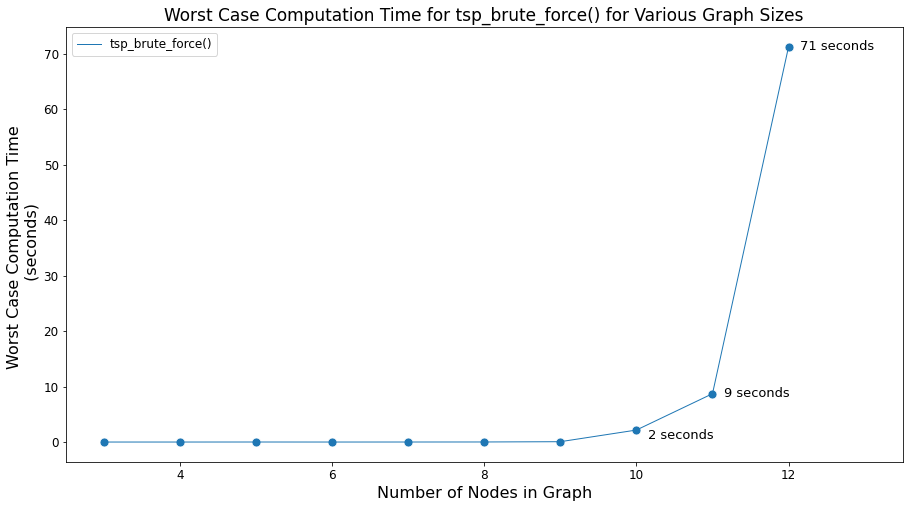

In [110]:
df = pd.DataFrame({'number_of_nodes': list(range(3, 13)), 
                   'time_brute_force': worst_times_brute_force
                  })
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot()
plt.rcParams.update({'font.size': 12})
sns.lineplot(ax=ax, x='number_of_nodes', y='time_brute_force', data=df, linewidth=1, label='tsp_brute_force()')
sns.scatterplot(ax=ax, x='number_of_nodes', y='time_brute_force', data=df, s=80)
ax.set_xlim([2.5, 13.5])
ax.set_xlabel('Number of Nodes in Graph', size=16)
ax.set_ylabel('Worst Case Computation Time \n (seconds)', size=16)
ax.set_title('Worst Case Computation Time for tsp_brute_force() for Various Graph Sizes', size=17)
plt.text(10.15, worst_times_brute_force[7]-1.5, str(round(worst_times_brute_force[7])) + ' seconds', size=13)
plt.text(11.15, worst_times_brute_force[8]-0.6, str(round(worst_times_brute_force[8])) + ' seconds', size=13)
plt.text(12.15, worst_times_brute_force[9]-0.6, str(round(worst_times_brute_force[9])) + ' seconds', size=13)
plt.show()

In [ ]:
# 25 graphs of 50 nodes will be input into tsp_greedy() and the maximum computation time will be extracted. The same will be
# done for 100 nodes, 150 nodes, ..., 1000 nodes. The result will be worst_times_greedy, a NumPy array of length 20 which has
# these 20 maximum computation times. The same will be done for tsp_christofides(), and the result will be stored in 
# worst_times_christofides, also a NumPy array of length 20.
worst_times_greedy = np.array([0]*20)
worst_times_christofides = np.array([0]*20)
n_iterations = 25
for i in range(n_iterations):
    
    # The computation times for the graph of 50 nodes, the graph of 100 nodes, ..., the graph of 1000 nodes for iteration i. 
    times_greedy = []
    times_christofides = []
    
    # Compute a graph of 50 nodes, a graph of 100 nodes, ..., a graph of 1000 nodes. 
    # For each calculate the computation times when the graph is input into tsp_greedy() and tsp_christofides().
    for n in range(50, 1050, 50):
    
        # Create a random graph with n nodes (labeled 0,1,2,...,n-1) satisfying the triangle inequality.
        # This graph will be input into tsp_greedy() and tsp_christofides() with 0 as the starting node, and the time to 
        # compute the Hamiltonian cycle output for both will be recorded.
        nodes = list(range(n))
        max_weight = 250
        G = create_random_G(nodes, max_weight)
        start = 0

        # Compute a Hamiltonian cycle using the greedy approach and record the computation time.
        t1 = time.time()
        tsp_greedy(G, start)
        t2 = time.time()
        times_greedy.append(t2-t1)

        # Compute a Hamiltonian cycle using Christofides algorithm and record the computation time.
        t1 = time.time()
        tsp_christofides(G, start)
        t2 = time.time()
        times_christofides.append(t2-t1)
    
    # Update the maximum time for each graph size for the greedy approach.
    times_greedy = np.array(times_greedy)
    worst_times_greedy = np.maximum(times_greedy, worst_times_greedy)
    
    # Update the maximum time for each graph size for Christofides algorithm.
    times_christofides = np.array(times_christofides)
    worst_times_christofides = np.maximum(times_christofides, worst_times_christofides)

As in the visualization above, each scatterplot point in the visualization below represents a maximum computation time of 25 values after tsp_christofides() or tsp_greedy() was called on 25 different graphs.

The visualization below shows that both the greedy approach and Christofides algorithm are quick at generating Hamiltonian cycles. For example, even if a trucker needs to visit as many as 150 locations, the greedy approach and Christofides algorithm could each generate a Hamiltonian cycle almost instantly (see the blue arrow). In reality though, a trucker will probably need to visit far fewer than 150 locations. For this reason, when there are > 11 nodes in the network (and brute-force is time-consuming) we will by default generate two Hamiltonian cycles, one using the greedy approach and one using Christofides algorithm, then select the one with the lesser total edge weight.

(The visualization furthermore shows that the computation time for the greedy approach grows very slowly. Therefore, even if this project were to be applied to an application other than trucking where the number of nodes in a graph is much larger than 150, it would still likely make sense to maintain our strategy of generating two Hamiltonian cycles, one using the greedy approach and one using Christofides algorithm, and selecting the one with the lesser total edge weight.)

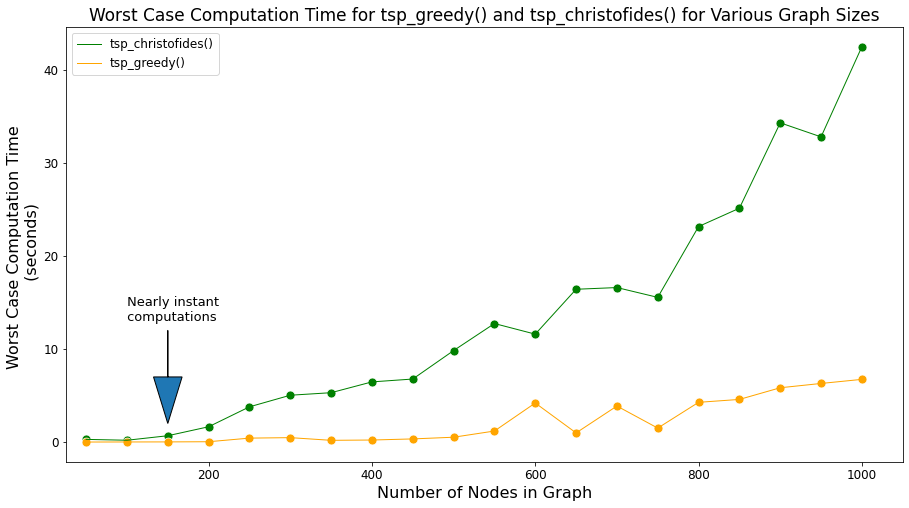

In [165]:
df = pd.DataFrame({'number_of_nodes': list(range(50, 1050, 50)),
                   'time_greedy': worst_times_greedy,
                   'time_christofides': worst_times_christofides
                  })
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot()
plt.rcParams.update({'font.size': 12})
sns.lineplot(ax=ax, x='number_of_nodes', y='time_christofides', data=df, linewidth=1, color='green', label='tsp_christofides()')
sns.lineplot(ax=ax, x='number_of_nodes', y='time_greedy', data=df, linewidth=1, color='orange', label='tsp_greedy()')
sns.scatterplot(ax=ax, x='number_of_nodes', y='time_christofides', data=df, s=80, color='green')
sns.scatterplot(ax=ax, x='number_of_nodes', y='time_greedy', data=df, s=80, color='orange')
ax.set_xlim([25, 1050])
ax.set_xlabel('Number of Nodes in Graph', size=16)
ax.set_ylabel('Worst Case Computation Time \n (seconds)', size=16)
ax.set_title('Worst Case Computation Time for tsp_greedy() and tsp_christofides() for Various Graph Sizes', size=17)
ax.arrow(150, 12, 0,-5, head_width=35, head_length=5)
plt.text(95, 13, ' Nearly instant \n computations', size=13)
plt.show()